# Libraries

In [1]:
from functions import *
import shapely as sh
import scipy as sc

# Select dataset

In [2]:
div = 2
df = sort_contours_using_uniform_pdf_and_group("dataset_contours_aggregate_by_patch.csv", "dataset_contours_aggregate_by_patch.json", 4, div)
df

,image_name,"x coordinate in 0,0","y coordinate in 0,0",diameter (px),diameter (mm),area (px),area (mm2),group by diameter (px)
0,01_129.png,"[54.29604853764795, 53.29604853764795, 52.2960...","[-30.824465878448336, -29.824465878448336, -29...",116.812012,3.504360,3214.0,2.89260,1
1,01_121.png,"[15.679024660570803, 14.679024660570803, 13.67...","[-38.87054585757846, -37.87054585757846, -37.8...",87.920616,2.637618,3007.5,2.70675,1
2,01_36.png,"[21.050979427915763, 20.050979427915763, 19.05...","[-34.879681993279064, -33.879681993279064, -32...",81.856903,2.455707,2033.5,1.83015,2
3,01_276.png,"[-7.284126984126999, -7.284126984126999, -8.28...","[-27.526388888888846, -26.526388888888846, -25...",60.638470,1.819154,840.0,0.75600,2


In [3]:
# color = [
#             '#3a7b9f', '#d4e2c3', '#f0119b', '#a1c935', "#28f8a1",
#             '#ff9000', '#b04c87', '#52e0ff', '#6012ff', '#c0ffee',
#             '#123456', '#654321', '#ff00ff', '#00ff00', '#0000ff',
#             '#abcdef', '#fedcba', '#a0b1c2', '#1f2e3d', '#f0f8ff', '#3a7b9f',    
#         ]

In [4]:
# img_w, img_h = 2500, 2500
# fig, ax = plt.subplots(figsize=(7, 7))
# ax.imshow(np.ones((img_h, img_w)), cmap="gray")
# for k in [1, 2, 3, 4, 5]:# , div+1):
#     df_group = df[df['group by diameter (px)'] == k].reset_index(drop=True)
#     target_size = df_group['diameter (px)'].max() + 50
#     nx = int(round(img_w / target_size))
#     ny = int(round(img_h / target_size))
#     cell_w = img_w / nx
#     cell_h = img_h / ny
#     centers = []
#     ids = []
#     if k > 1:
#         quad_contours = []
#     for j in range(ny):
#         for i in range(nx):
#             cx = (i + 0.5) * cell_w
#             cy = (j + 0.5) * cell_h
#             centers.append((cx, cy))
#             ids.append(j * nx + i)
#             if k > 1:
#                 # quad_contours.append([(cx - cell_w / 2, cy - cell_h / 2), (cx + cell_w / 2, cy - cell_h / 2), (cx + cell_w / 2, cy + cell_h / 2), (cx - cell_w / 2, cy + cell_h / 2)])
#                 n = 5
#                 quad_contours.append([(cx - (cell_w-n) / 2, cy - (cell_h-n) / 2), (cx + (cell_w-n) / 2, cy - (cell_h-n) / 2), (cx + (cell_w-n) / 2, cy + (cell_h-n) / 2), (cx - (cell_w-n) / 2, cy + (cell_h-n) / 2)])
#     center_ids_selected = np.random.choice(ids, size=len(df_group), replace=False)
#     centers = np.array(centers)

#     # Check colision
#     if k > 1:
#         colision_bin = [0] * len(quad_contours)
#         for i, quad in enumerate(quad_contours):
#             quad_poly = sh.geometry.Polygon(quad)
#             for cont in contours:
#                 if quad_poly.intersects(sh.geometry.Polygon(cont)):
#                     colision_bin[i] = 1
#                     break
#         ids_temp = [i for i in range(len(quad_contours)) if colision_bin[i] == 0]
#         if len(ids_temp) < len(df_group):
#             center_ids_selected = np.random.choice(ids_temp, size=len(ids_temp), replace=False)
#         else:
#             center_ids_selected = np.random.choice(ids_temp, size=len(df_group), replace=False)

#     if k == 4:
#         for i in range(nx + 1):
#             x = i * cell_w
#             ax.axvline(x, color='blue', linewidth=1)
#         for j in range(ny + 1):
#             y = j * cell_h
#             ax.axhline(y, color='blue', linewidth=1)
#     if k <= 1:
#         contours = []
#     for m, row in df_group.iterrows():
#         print(m)
#         x_df = row['x coordinate in 0,0']
#         y_df = row['y coordinate in 0,0']
#         cx, cy = centers[center_ids_selected[m], 0], centers[center_ids_selected[m], 1]
#         cx_noise = noise_point([cx], value_noise=1)
#         cy_noise = noise_point([cy], value_noise=1)
#         ax.scatter(cx_noise, cy_noise, c='red', s=2)
#         x_new, y_new = trans_rota_polygon(x_df, y_df, cx_noise[0], cy_noise[0], angle=np.random.uniform(0, 360))
#         contours.append(list(zip(x_new, y_new)))
#         ax.plot(x_new, y_new, color[k])
#         ax.fill(x_new, y_new, color[k], alpha=0.3)
# plt.show()

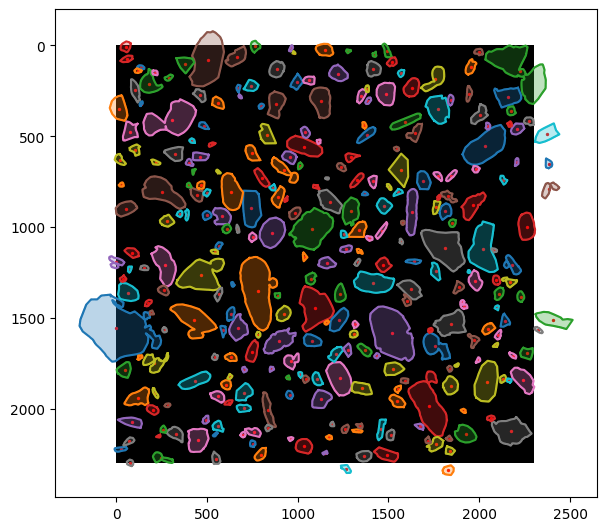

In [5]:
div = 20
df = sort_contours_using_uniform_pdf_and_group("dataset_contours_aggregate_by_patch.csv", "dataset_contours_aggregate_by_patch.json", 300, div)
img_w, img_h = 2300, 2300
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(np.ones((img_h, img_w)), cmap="gray")
contours = []
collision_control = []
for m, row in df.iterrows():
    if m < 1:
        n = 1
        sampler = sc.stats.qmc.LatinHypercube(d=2)
        sample = sampler.random(n=n)
        centroids = sc.stats.qmc.scale(sample, [0, 0], [img_w, img_h])
        x_df = row['x coordinate in 0,0']
        y_df = row['y coordinate in 0,0']
        cx, cy = centroids[0, 0], centroids[0, 1]
        cx_noise = noise_point([cx], value_noise=1)
        cy_noise = noise_point([cy], value_noise=1)
        x_new, y_new = trans_rota_polygon(x_df, y_df, cx_noise[0], cy_noise[0], angle=np.random.uniform(0, 360))
        current_contour = list(zip(x_new, y_new))
        contours.append(current_contour)
        ax.scatter(cx_noise, cy_noise, c='red', s=2)
        ax.plot(x_new, y_new)
        ax.fill(x_new, y_new, alpha=0.3)
    else:
        th = True
        max_iter = 0
        while th and max_iter < 10:
            # print("max_iter:", max_iter)
            n = 1
            sampler = sc.stats.qmc.LatinHypercube(d=2)
            sample = sampler.random(n=n)
            centroids = sc.stats.qmc.scale(sample, [0, 0], [img_w, img_h])
            x_df = row['x coordinate in 0,0']
            y_df = row['y coordinate in 0,0']
            cx, cy = centroids[0, 0], centroids[0, 1]
            cx_noise = noise_point([cx], value_noise=5)
            cy_noise = noise_point([cy], value_noise=5)
            x_new, y_new = trans_rota_polygon(x_df, y_df, cx_noise[0], cy_noise[0], angle=np.random.uniform(0, 360))
            current_contour = list(zip(x_new, y_new))
            for _, quad in enumerate([current_contour]):
                quad_poly = sh.geometry.Polygon(quad)
                for cont in contours:
                    th = quad_poly.intersects(sh.geometry.Polygon(cont))
                    # print("th:", th)
                    if th:
                        # print("Collision detected, retrying...")
                        break
            if th==False:
                # print("passei aqui no False th...")
                contours.append(current_contour)
                ax.scatter(cx_noise, cy_noise, c='red', s=2)
                ax.plot(x_new, y_new)
                ax.fill(x_new, y_new, alpha=0.3)
                break
            else:
                # print("Another try...")
                pass
            max_iter += 1
# ax.axis('off')  # Remove os eixos (opcional)
plt.savefig(
    'output_image.png',  # Nome do arquivo (salvo na raiz do projeto)
    dpi=600,            # Resolução (ajuste para controlar qualidade/tamanho)
    bbox_inches='tight', # Remove bordas brancas
    pad_inches=0,       # Remove espaçamento extra
    transparent=True    # Fundo transparente (opcional)
)

# Exibe a imagem (opcional, pode remover se quiser apenas salvar)
plt.show()

# Gross section generator

In [7]:
# generate_canvas_from_json("dataset_contours_aggregate_by_patch.json", (2500, 2500), 300)